In [1]:
#SNEHA -- START -- IMPORT CLEAN DATA FROM RONDA'S EXPORT

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import seaborn as sns
import numpy as np
import scipy.stats as stats
from pathlib import Path
import requests
import json
import time
from pprint import pprint
# from api_key import api_key

In [ ]:
# CLEANED DATA IMPORT FROM RONDA"S EXPOPRTED CSV
csv_path = Path('Coffee_exp.csv')
coffee_df = pd.read_csv(csv_path, encoding="utf8")
coffee_df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country_of_Origin', 'Farm.Name',
       'Altitude', 'Region', 'Number.of.Bags', 'Bag.Weight', 'Harvest.Year',
       'Grading.Date', 'Variety', 'Processing_Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup',
       'Sweetness', 'Cupper.Points', 'CoffeeScore', 'Moisture',
       'Category.One.Defects', 'Quakers', 'Color', 'Category.Two.Defects',
       'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')

In [ ]:
coffee_df_new = coffee_df.rename(columns={'Total.Cup.Points': 'CoffeeScore',
                                            'Country.of.Origin': 'Country_of_Origin',
                                         'Processing.Method': 'Processing_Method'})

In [ ]:
#SNEHA -- END -- IMPORT CLEAN DATA FROM RONDA"S EXPORT

In [ ]:
#TAYLOR -- START -- QUESTION 1 : The distribution scores across metrics -Compare Arabica and Robusta (Maybe stacked bar?)

In [ ]:
#Create a pie chart of coffee value counts by Species

count_of_species = coffee_df_new['Species'].value_counts()
count_of_species
labels = ['Arabica','Robusta']
plt.pie(count_of_species, labels=labels,autopct='%1.1f%%')
plt.show()

In [ ]:
#Create bar chart showing the percentage of coffee that is Arabica vs Robusta

species_means = coffee_df_new.groupby(['Species'])['CoffeeScore'].mean()
species_score_chart = species_means.plot(kind='bar', x='Species', rot=0)
plt.ylim(0,100)
plt.ylabel('Coffee Score')
plt.title('Coffee Score by Species')

for container in species_score_chart.containers:
    species_score_chart.bar_label(container, fmt='%.1f', fontsize=12)
plt.show()

In [ ]:
#Stacked bar by Country of Origin and Species

coffee_df_new.groupby(['Country_of_Origin', 'Species']).size().unstack().plot(kind='bar', color=['saddlebrown', 'peru'], stacked=True)
plt.ylabel("Value Count of Unique Coffee Beans")
plt.show()

In [ ]:
#Create Dataframes for the means of attributes for each species, and merge

mean_df_arabica = pd.DataFrame({'Attribute': ['Flavor','Aroma','Aftertaste','Body', 'Acidity', 'Uniformity', 'Balance'],
                                'Arabica': [7.518070, 7.563806, 7.397696, 7.517727, 7.533112, 9.833394, 7.517506]})
mean_df_robusta = pd.DataFrame({'Attribute': ['Flavor','Aroma','Aftertaste','Body', 'Acidity', 'Uniformity', 'Balance'],
                                'Robusta': [7.630714, 7.702500, 7.559643, 7.506786, 7.657143, 9.904286, 7.541786]})

coffee_means = pd.merge(mean_df_arabica, mean_df_robusta, on='Attribute')

In [ ]:
#TAYLOR -- END -- QUESTION 1 : The distribution scores across metrics -Compare Arabica and Robusta (Maybe stacked bar?)

#Plot a grouped bar chart for means of attributes by species

species_attribute_chart = coffee_means.plot(kind='bar', x='Attribute', color=['saddlebrown', 'peru'], logy=True, rot=0)
species_attribute_chart.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Average Attribute Score')
plt.title('Average of Attribute Scores by Species')
plt.show()

In [ ]:
#SNEHA -- START -- QUESTION 2 : This team likes Columbian coffee: H0: Distribution of "Good" Scores across metrics is not significant in Columbia vs the world

In [75]:
#Creating High/Average/Low values for each coffee metric score
def Score_categories(DataFrame, Score_Columns): 
    for i, m in enumerate(Score_Columns):
        percentiles =DataFrame[m].quantile([(1/3),(2/3)])
        low = percentiles[(1/3)]
        mid = percentiles[(2/3)]

        conditions = [(DataFrame[m] <= low),(DataFrame[m] > low) & (DataFrame[m] <= mid),(DataFrame[m] > mid)]
        values = ['Low', 'Average', 'High']
        DataFrame[f"{m}_Bucket"] = np.select(conditions, values)

metrics = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
'CoffeeScore', 'Moisture', 'Category.One.Defects', 'Quakers', 'Category.Two.Defects','altitude_mean_meters','Number.of.Bags']
Score_categories(coffee_df_new, metrics)

In [76]:
coffee_df_new.head()
coffee_df_new.to_csv("Coffee_Bins.csv", index=False)

In [185]:
#High score distribution for Colombia
metrics = ['Aroma_Bucket', 'Flavor_Bucket','Aftertaste_Bucket', 'Acidity_Bucket', 'Body_Bucket', 'Balance_Bucket','Uniformity_Bucket', 'Clean.Cup_Bucket', 'Sweetness_Bucket',\
           'Cupper.Points_Bucket', 'CoffeeScore_Bucket', 'Moisture_Bucket','Category.One.Defects_Bucket', 'Quakers_Bucket','Category.Two.Defects_Bucket', 'altitude_mean_meters_Bucket',\
           'Number.of.Bags_Bucket']
country_dist =[]

def score_counts(cols):
    for i,m in enumerate(cols):
        country_dist.append(coffee_df_new.loc[(coffee_df_new["Country_of_Origin"]=="Mexico") & (coffee_df_new[m]=="High"),m].count())
                                
score_counts(metrics)

country_dist = [i for i in country_dist if i>=5]
country_dist_norm=[((i/sum(country_dist))*10000) for i in country_dist]
sum(country_dist_norm)
# country_dist_norm

10000.0

In [186]:
#High score distribution for rest of the world (coffee_df_new["Country_of_Origin"]!="Colombia") & 
metrics = ['Aroma_Bucket', 'Flavor_Bucket','Aftertaste_Bucket', 'Acidity_Bucket', 'Body_Bucket', 'Balance_Bucket','Uniformity_Bucket', 'Clean.Cup_Bucket', 'Sweetness_Bucket',\
           'Cupper.Points_Bucket', 'CoffeeScore_Bucket', 'Moisture_Bucket','Category.One.Defects_Bucket', 'Quakers_Bucket','Category.Two.Defects_Bucket', 'altitude_mean_meters_Bucket',\
           'Number.of.Bags_Bucket']
All_dist =[]

def score_counts(cols):
    for i,m in enumerate(cols):
        All_dist.append(coffee_df_new.loc[(coffee_df_new[m]=="High"),m].count())                           
score_counts(metrics)

All_dist = [i for i in All_dist if i>=5]
All_dist_norm=[((i/sum(All_dist))*10000) for i in All_dist]

sum(All_dist_norm)
# All_dist_norm

10000.000000000002

In [187]:
# With 17 rows, the degree of freedom is 17-1 = 16
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [188]:
stats.chisquare(colombia_dist, All_dist_norm)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
15.155088852988694

In [ ]:
#SNEHA -- END -- QUESTION 2 : This team likes Columbian coffee: H0: Distribution of "Good" Scores across metrics is not significant in Columbia vs the world

In [ ]:
#GANESH -- START -- QUESTION 3 : Procesing Method - Visualize with scatter - metrics Scores vs Processing Method

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


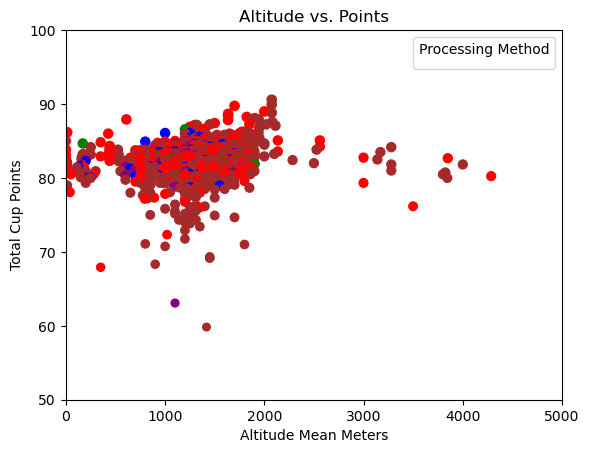

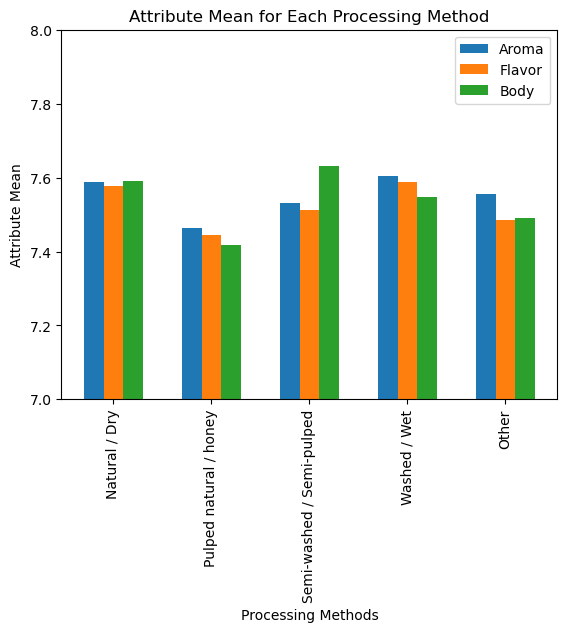

In [28]:
methods = [
    "Natural / Dry",
    "Pulped natural / honey",
    "Semi-washed / Semi-pulped",
    "Washed / Wet",
    "Other"
    ] 
coffee_process_aroma = coffee_process_df.groupby(by="Processing_Method")["Aroma"].mean()
coffee_process_aroma
coffee_process_flavor = coffee_process_df.groupby(by="Processing_Method")["Flavor"].mean()
coffee_process_flavor
coffee_process_body= coffee_process_df.groupby(by="Processing_Method")["Body"].mean()
coffee_process_body
X_axis = np.arange(len(methods))
plt.bar(X_axis - 0.2, coffee_process_aroma, 0.2, label = 'Aroma')
plt.bar(X_axis + 0.0, coffee_process_flavor, 0.2, label = 'Flavor')
plt.bar(X_axis + 0.2, coffee_process_body, 0.2, label = 'Body')
plt.xticks(X_axis, methods, rotation='vertical')
plt.ylim(7,8)
plt.xlabel("Processing Methods")
plt.ylabel("Attribute Mean")
plt.title("Attribute Mean for Each Processing Method")
plt.legend()
plt.show()
#coffee_process_body.plot.bar()
#coffee_process_aroma
#coffee_process_aroma.plot.bar()
#plt.ylim(7,8)
#coffee_process_flavor
#coffee_process_flavor.plot.bar()
#plt.ylim(7,8)

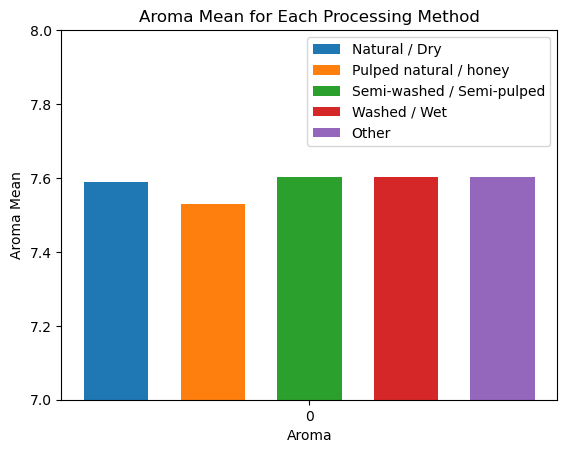

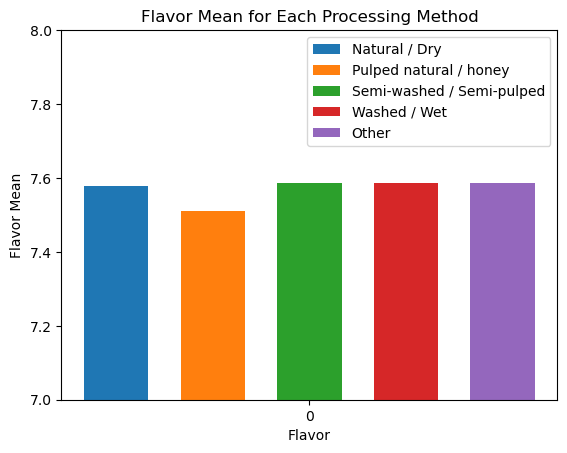

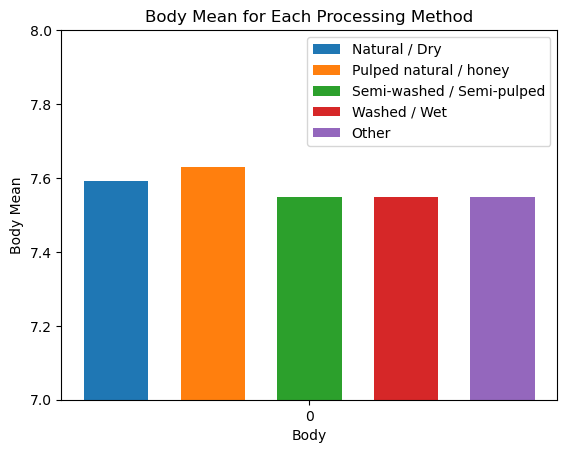

In [100]:
coffee_process_new_df = coffee_process_df.copy()
methods = [
    "Natural / Dry",
    "Pulped natural / honey",
    "Semi-washed / Semi-pulped",
    "Washed / Wet",
    "Other"
    ] 
attributes = [
    "Aroma",
    "Flavor",
    "Body"
]

aroma_other = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Other"]["Aroma"].mean()
aroma_nat = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Natural / Dry"]["Aroma"].mean()
aroma_pulp = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Pulped natural / honey"]["Aroma"].mean()
aroma_semi = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Semi-washed / Semi-pulped"]["Aroma"].mean()
aroma_wash = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Other"]["Aroma"].mean()

flavor_other = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Other"]["Flavor"].mean()
flavor_nat = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Natural / Dry"]["Flavor"].mean()
flavor_pulp = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Pulped natural / honey"]["Flavor"].mean()
flavor_semi = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Semi-washed / Semi-pulped"]["Flavor"].mean()
flavor_wash = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Other"]["Flavor"].mean()

body_other = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Other"]["Body"].mean()
body_nat = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Natural / Dry"]["Body"].mean()
body_pulp = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Pulped natural / honey"]["Body"].mean()
body_semi = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Semi-washed / Semi-pulped"]["Body"].mean()
body_wash = coffee_process_new_df[coffee_process_new_df["Processing_Method"] == "Other"]["Body"].mean()

#X_axis = np.arange(len(attributes))
X_axis = np.arange(1)
plt.bar(X_axis - 0.3, aroma_nat, 0.1, label = 'Natural / Dry')
plt.bar(X_axis -0.15, aroma_pulp, 0.1, label = 'Pulped natural / honey')
plt.bar(X_axis -0.0, aroma_semi, 0.1, label = 'Semi-washed / Semi-pulped')
plt.bar(X_axis + 0.15, aroma_semi, 0.1, label = 'Washed / Wet')
plt.bar(X_axis + 0.3, aroma_semi, 0.1, label = 'Other')

plt.xticks(X_axis)
plt.ylim(7,8)
plt.xlabel("Aroma")
plt.ylabel("Aroma Mean")
plt.title("Aroma Mean for Each Processing Method")
plt.legend()
plt.show()

X_axis = np.arange(1)
plt.bar(X_axis -0.3, flavor_nat, 0.1, label = 'Natural / Dry')
plt.bar(X_axis -0.15, flavor_pulp, 0.1, label = 'Pulped natural / honey')
plt.bar(X_axis -0.00, flavor_semi, 0.1, label = 'Semi-washed / Semi-pulped')
plt.bar(X_axis + 0.15, flavor_semi, 0.1, label = 'Washed / Wet')
plt.bar(X_axis + 0.3, flavor_semi, 0.1, label = 'Other')

plt.xticks(X_axis)
plt.ylim(7,8)
plt.xlabel("Flavor")
plt.ylabel("Flavor Mean")
plt.title("Flavor Mean for Each Processing Method")
plt.legend()
plt.show()

X_axis = np.arange(1)
plt.bar(X_axis -0.3, body_nat, 0.1, label = 'Natural / Dry')
plt.bar(X_axis -0.15, body_pulp, 0.1, label = 'Pulped natural / honey')
plt.bar(X_axis -0.00, body_semi, 0.1, label = 'Semi-washed / Semi-pulped')
plt.bar(X_axis + 0.15, body_semi, 0.1, label = 'Washed / Wet')
plt.bar(X_axis + 0.3, body_semi, 0.1, label = 'Other')

plt.xticks(X_axis)
plt.ylim(7,8)
plt.xlabel("Body")
plt.ylabel("Body Mean")
plt.title("Body Mean for Each Processing Method")
plt.legend()
plt.show()

In [84]:
#GANESH -- END -- QUESTION 3 : Procesing Method - Visualize with scatter - metrics Scores vs Processing Method

In [85]:
#TAYLOR -- START -- QUESTION 4 : ANOVA - Flavor, Aroma, Body - Distribution impact by Processing methods

#Create a boxplot to compare Flavor score means across processing methods

#Flavor ANOVA
#Create a boxplot to compare Flavor score means across processing methods
coffee_df_new.boxplot('Flavor', by='Processing_Method', figsize=(20,10))
plt.ylabel('Average Score for Flavor')
plt.show()

In [ ]:
#Flavor ANOVA
#Extract individual groups
group0 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Natural / Dry']['Flavor']
group1 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Other']['Flavor']
group2 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Pulped natural / honey']['Flavor']
group3 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Semi-washed / Semi-pulped']['Flavor']
group4 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Washed / Wet']['Flavor']

In [ ]:
#Flavor ANOVA
#Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4)

In [ ]:
#Aroma ANOVA
#Create a boxplot to compare Aroma score means across processing methods
coffee_df_new.boxplot('Aroma', by='Processing_Method', figsize=(20,10))
plt.ylabel('Average Score for Aroma')
plt.show()

In [ ]:
#Aroma ANOVA
#Extract individual groups
group0 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Natural / Dry']['Aroma']
group1 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Other']['Aroma']
group2 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Pulped natural / honey']['Aroma']
group3 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Semi-washed / Semi-pulped']['Aroma']
group4 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Washed / Wet']['Aroma']

In [ ]:
#Aroma ANOVA
#Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4)

In [ ]:
#Body ANOVA
#Create a boxplot to compare Body score means across processing methods
coffee_df_new.boxplot('Body', by='Processing_Method', figsize=(20,10))
plt.ylabel('Average Score for Body')
plt.show()

In [ ]:
#Body ANOVA
#Extract individual groups
group0 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Natural / Dry']['Body']
group1 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Other']['Body']
group2 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Pulped natural / honey']['Body']
group3 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Semi-washed / Semi-pulped']['Body']
group4 = coffee_df_new[coffee_df_new['Processing_Method'] == 'Washed / Wet']['Body']

In [ ]:
#TAYLOR -- END -- QUESTION 4 : ANOVA - Flavor, Aroma, Body - Distribution impact by Processing methods
#Body ANOVA
#Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4)

In [ ]:
#AARON -- START -- QUESTION 5 : Color coded map for Species? Overall Scores?

In [ ]:
countries = ["Spain"]#, "England", "Ireland"]
url = f"https://api.geoapify.com/v1/geocode/search?"
country_coordinates = []
def color_coffee_map(countries):
    
     #coffee_df_new["Country"]
    for i, country in enumerate(countries):

        
        #target_country = countries #coffee_df_new["Country"]
        params = {'country' : country,
                  'apiKey': api_key,
                  }
        response = requests.get(url, params=params).json()
        print(response.status_code)
        print(json.dumps(response, indent=4, sort_keys=True))
        
        latitude = response["features"][0]["properties"]["lat"]
        longitude = response["features"][0]["properties"]["lon"]

        country_coordinates.append({
            "country" : country,
            "lat" : latitude,
            "lon" : longitude
        })
        #else: pass

        country_coordinates_df = pd.DataFrame(country_coordinates)
        print(country_coordinates_df)

        #add lat and long columns into df

    map = country_coordinates_df.hvplot.points(
            "lon",
            "lat",
            geo = True,
            tiles = "OSM",
            
            #size = "CoffeeScore",
            
            color = "country",
            frame_width = 800,
            frame_height = 600,
            scale = 0.5

           )
    return map


color_coffee_map(countries)

In [ ]:
#AARON -- END -- QUESTION 5 : Color coded map for Species? Overall Scores?